<a href="https://colab.research.google.com/github/TimotheeeNiven/IntroML_TNiven/blob/main/Homework2_TNiven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Homework 2

Timothy Niven

Student ID: 801248124

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = '/content/drive/MyDrive/IntroML/CSVFiles/Housing.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0, 'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
# Defining the map function for furnishing status

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
def gradient_descent(X_train, X_val, y_train, y_val, theta, learning_rate, n_iterations):
    m = len(X_train)
    train_losses = []  # List to store training losses over iterations
    val_losses = []    # List to store validation losses over iterations

    for iteration in range(n_iterations):
        gradients = (2/m) * X_train.T.dot(X_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        # Calculate and append training and validation losses
        train_loss = (1/m) * np.sum(np.square(X_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_val.dot(theta) - y_val))
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

In [ ]:
#This is the plotting syntax that will be used throughout this
def plot(train_losses,val_losses,theta):

  plt.plot(train_losses, label="Training Loss")
  plt.plot(val_losses, label="Validation Loss")
  plt.xlabel("Iteration")
  plt.ylabel("Mean Squared Error")
  plt.legend()
  plt.title("Training and Validation Loss Over Iterations")
  plt.show()
  print(theta)

In [ ]:
#This part of the code will be used to generate the X_Train and X_val sets for part A
def X_A(df_train,df_test):
  m = len(df_train.values[:,0])
  n = len(df_test.values[:,0])
  X_train = np.hstack((
                      df_train.values[:,1].reshape(m,1),
                      df_train.values[:,2].reshape(m,1),
                      df_train.values[:,3].reshape(m,1),
                      df_train.values[:,4].reshape(m,1),
                      df_train.values[:,10].reshape(m,1)
                      ))
  X_val = np.hstack((
                      df_test.values[:,1].reshape(n,1),
                      df_test.values[:,2].reshape(n,1),
                      df_test.values[:,3].reshape(n,1),
                      df_test.values[:,4].reshape(n,1),
                      df_test.values[:,10].reshape(n,1)
                      ))
  X_a_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_a_val = np.c_[np.ones((len(X_val), 1)), X_val]

  return X_a_train,X_a_val

In [ ]:
#This part of the code will be used to generate the X_Train and X_Val sets for part B
def X_B(df_train,df_test):
  m = len(df_train.values[:,0])
  n = len(df_test.values[:,0])
  X_train = np.hstack((
                     df_train.values[:,1].reshape(m,1),
                     df_train.values[:,2].reshape(m,1),
                     df_train.values[:,3].reshape(m,1),
                     df_train.values[:,4].reshape(m,1),
                     df_train.values[:,5].reshape(m,1),
                     df_train.values[:,6].reshape(m,1),
                     df_train.values[:,7].reshape(m,1),
                     df_train.values[:,8].reshape(m,1),
                     df_train.values[:,9].reshape(m,1),
                     df_train.values[:,10].reshape(m,1),
                     df_train.values[:,11].reshape(m,1)
                     ))
  X_val = np.hstack((
                      df_test.values[:,1].reshape(n,1),
                      df_test.values[:,2].reshape(n,1),
                      df_test.values[:,3].reshape(n,1),
                      df_test.values[:,4].reshape(n,1),
                      df_test.values[:,5].reshape(n,1),
                      df_test.values[:,6].reshape(n,1),
                      df_test.values[:,7].reshape(n,1),
                      df_test.values[:,8].reshape(n,1),
                      df_test.values[:,9].reshape(n,1),
                      df_test.values[:,10].reshape(n,1),
                      df_test.values[:,11].reshape(n,1)
  ))
  X_a_train = np.c_[np.ones((len(X_train), 1)), X_train]
  X_a_val = np.c_[np.ones((len(X_val), 1)), X_val]

  return X_a_train,X_a_val

<ipython-input-65-a2aece3ac2f9>:11: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_train.dot(theta) - y_train))
<ipython-input-65-a2aece3ac2f9>:12: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_val.dot(theta) - y_val))
<ipython-input-65-a2aece3ac2f9>:8: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


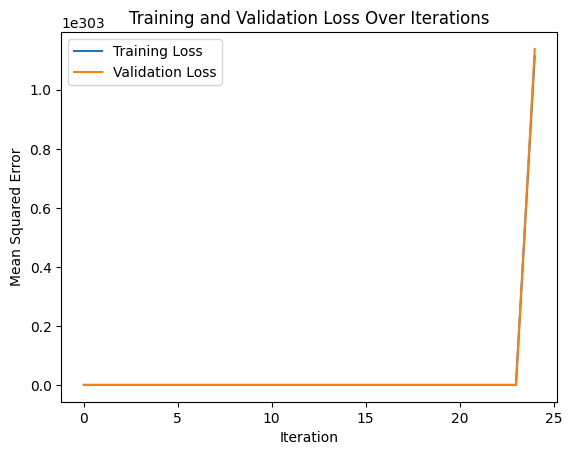

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [ ]:
#Question 1A
#Declaring these values for plotting thetas later
labelsA = ['theta 0','area', 'bedrooms', 'bathrooms', 'stories', 'parking']
labelsB = ['theta 0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
#This is the only time Y has to be intialized during this code because it will never change
m1 = len(df_train)
n1 = len(df_test)

y_train = df_train[['price']].values.reshape(m1,1)
y_val = df_test[['price']].values.reshape(n1,1)
X_b_train,X_b_val = X_A(df_train,df_test)
X_b_train[:5]
theta1A = np.zeros((6, 1))
learning_rate = 0.01
n_iterations = 1000

theta1A, train_losses1A, val_losses1A = gradient_descent(X_b_train, X_b_val, y_train, y_val, theta1A, learning_rate, n_iterations)

#Plot the training and validation loss after each iteration
plot(train_losses1A,val_losses1A,theta1A)


<ipython-input-65-a2aece3ac2f9>:11: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_train.dot(theta) - y_train))
<ipython-input-65-a2aece3ac2f9>:12: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_val.dot(theta) - y_val))
<ipython-input-65-a2aece3ac2f9>:8: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


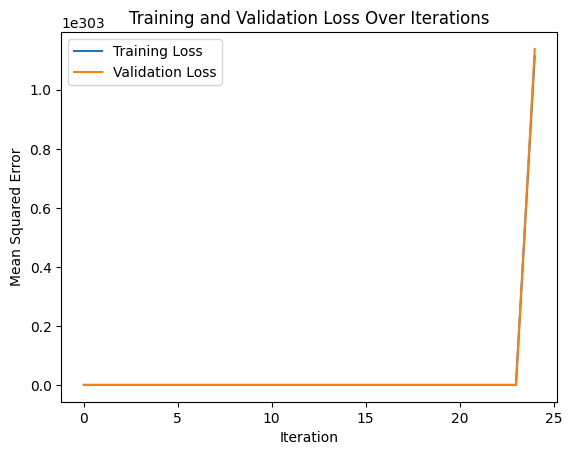

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [ ]:
#Problem 1B
X_a_train, X_a_val = X_B(df_train,df_test)

theta1B = np.zeros((12, 1))
learning_rate1B = 0.01
n_iterations1B = 1000

theta1B, train_losses1B, val_losses1B = gradient_descent(X_a_train, X_a_val, y_train, y_val, theta1B, learning_rate1B, n_iterations1B)

plot(train_losses1B,val_losses1B,theta1B)


In [ ]:
#Question 2A and 2B NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','furnishingstatus']
#Here we will create a new data frame as to not mess with the original data frame from 1, this we be useful for Question 3
df2 = df
df2[num_vars] = scaler.fit_transform(df2[num_vars])
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.5
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1.0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1.0


In [ ]:
#Question 2B Normalization Output
df2B = df
num_vars2B = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking','furnishingstatus']
df2B[num_vars2B] = scaler.fit_transform(df2B[num_vars2B])
df2B.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1.0


In [ ]:
# We state it this was so that the training and data sets have the same rows
np.random.seed(0)
df_train2B, df_test2B = train_test_split(df2B, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train2, df_test2 = train_test_split(df2, train_size = 0.8, test_size = 0.2, random_state = 100)

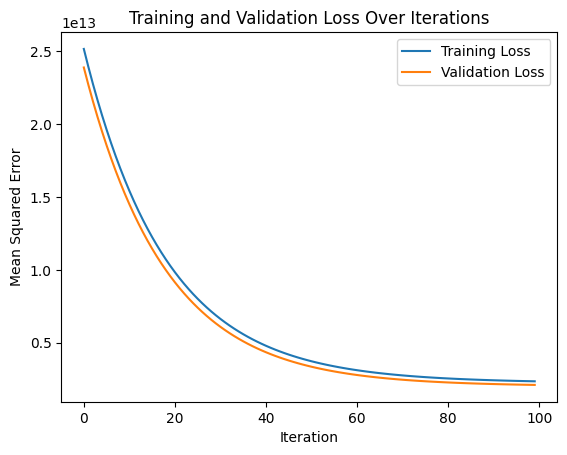

[[3189560.33662591]
 [ 996570.73411374]
 [1343536.82997718]
 [ 567498.02708626]
 [1134712.68182466]
 [1000465.1435221 ]]


In [ ]:
#Question 2A NORMALIZATION
X_2A_train,X_2A_val = X_A(df_train2,df_test2)

theta2A = np.zeros((6, 1))
learning_rate2A = 0.01
n_iterations2A = 100

theta2A, train_losses2A, val_losses2A = gradient_descent(X_2A_train, X_2A_val, y_train, y_val, theta2A, learning_rate2A, n_iterations2A)

#Plot the training and validation loss after each iteration

plot(train_losses2A,val_losses2A,theta2A)

In [ ]:
def thetaplot(theta,labels):
  plt.figure(figsize=(8, 6))
  plt.bar(labels, theta)
  plt.xlabel('Theta')
  plt.ylabel('Value')
  plt.title('Bar Graph of Theta Values')
  plt.show()

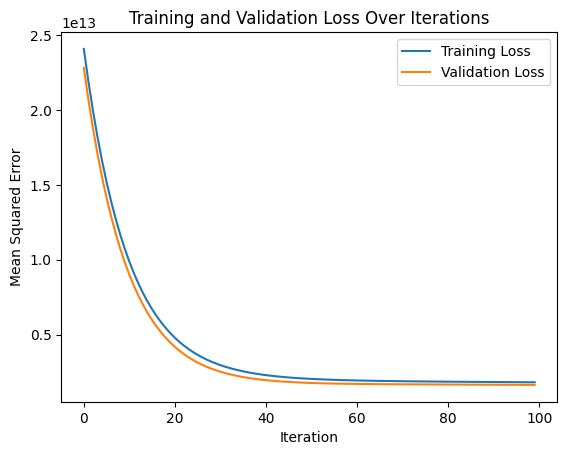

[[1863991.85103783]
 [ 613650.99033307]
 [ 829043.5128241 ]
 [ 422900.17839788]
 [ 762893.25476454]
 [1578689.93301106]
 [ 424302.53701359]
 [ 608828.4421609 ]
 [ 197835.6886361 ]
 [ 867777.11030873]
 [ 631716.71541926]
 [ 553270.16320711]]


In [ ]:
#Question 2B
X_2B_train,X_2B_val = X_B(df_train2,df_test2)
theta2B = np.zeros((12, 1))
learning_rate2B = 0.01
n_iterations2B = 100

theta2B, train_losses2B, val_losses2B = gradient_descent(X_2B_train, X_2B_val, y_train, y_val, theta2B, learning_rate2B, n_iterations2B)

#Plot
plot(train_losses2B,val_losses2B,theta2B)

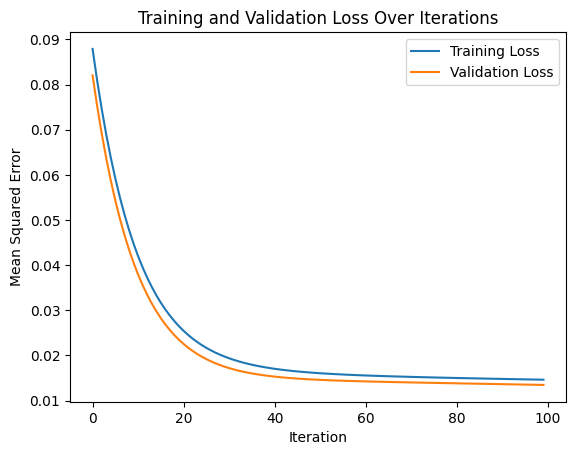

[[0.09124098]
 [0.03940546]
 [0.04657709]
 [0.03184445]
 [0.05130363]
 [0.0880341 ]
 [0.03089856]
 [0.03719071]
 [0.01346976]
 [0.06313581]
 [0.04234165]
 [0.03969345]]


In [ ]:
#Question 2B Output Standardization
X_2BO_train,X_2BO_val = X_B(df_train2B,df_test2B)
y_train2BO = df_train2B[['price']].values.reshape(m1,1)
y_val2BO = df_test2B[['price']].values.reshape(n1,1)
theta2BO = np.zeros((12, 1))
learning_rate2BO = 0.01
n_iterations2BO = 100

theta2BO, train_losses2BO, val_losses2BO = gradient_descent(X_2BO_train, X_2BO_val, y_train2BO, y_val2BO, theta2BO, learning_rate2BO, n_iterations2BO)

#Plot
plot(train_losses2BO,val_losses2BO,theta2BO)

In [ ]:
#Question 2A and 2B Normalization
from sklearn.preprocessing import StandardScaler
import statistics
# Calculate the standard deviation
columns = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','furnishingstatus']
df3 = df

scaler = StandardScaler()

# Fit and transform the scaler into the forementioned calculation
df3[columns] = scaler.fit_transform(df[columns])
df3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train3, df_test3 = train_test_split(df3, train_size = 0.8, test_size = 0.2, random_state = 100)

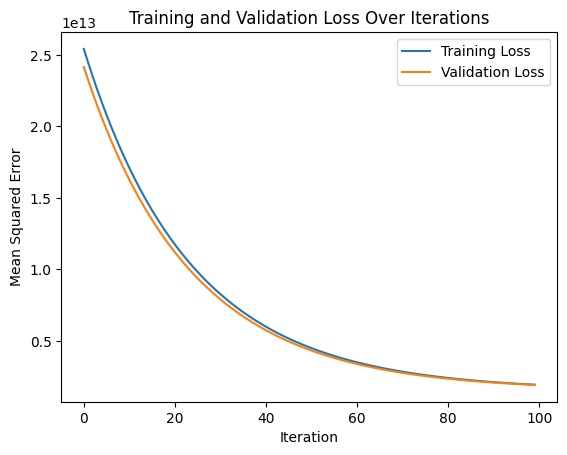

[[4140904.44376359]
 [ 632282.01827337]
 [ 113478.41702578]
 [ 598915.17252822]
 [ 449149.32791471]
 [ 380475.07214117]]


In [ ]:
#Question 2A STANDARIZATION
X_2AS_train,X_2AS_val = X_A(df_train3,df_test3)
theta2AS = np.zeros((6, 1))
learning_rate2AS = 0.01
n_iterations2AS = 100

theta2AS, train_losses2AS, val_losses2AS = gradient_descent(X_2AS_train, X_2AS_val, y_train, y_val, theta2AS, learning_rate2AS, n_iterations2AS)

#Plot the training and validation loss after each iteration

plot(train_losses2AS,val_losses2AS,theta2AS)

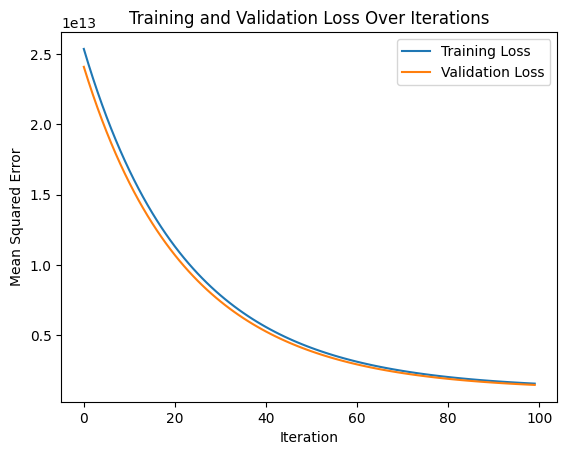

[[4144517.93848877]
 [ 480771.08903623]
 [  86836.91369441]
 [ 541562.93440688]
 [ 389582.11862321]
 [ 233108.65382169]
 [ 152576.78741067]
 [ 159739.84458842]
 [ 204000.5221849 ]
 [ 339312.61949928]
 [ 314541.55422391]
 [ 244671.84372006]]


In [ ]:
#Question 2B Standardization
X_2BS_train,X_2BS_val = X_B(df_train3,df_test3)
theta2BS = np.zeros((12, 1))
learning_rate2BS = 0.01
n_iterations2BS = 100

theta2BS, train_losses2BS, val_losses2BS = gradient_descent(X_2BS_train, X_2BS_val, y_train, y_val, theta2BS, learning_rate2BS, n_iterations2BS)

#Plot
plot(train_losses2BS,val_losses2BS,theta2BS)

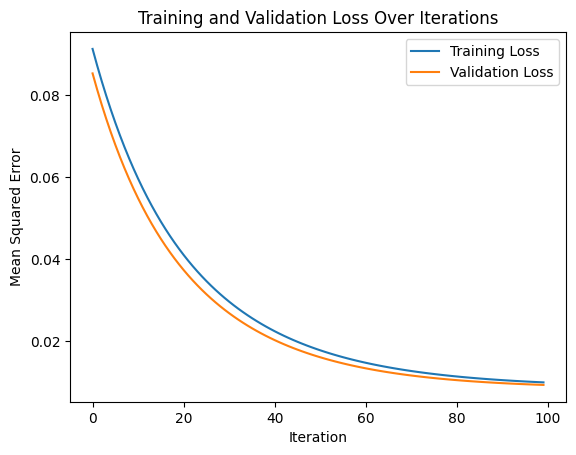

[[0.22770773]
 [0.04204734]
 [0.00963968]
 [0.046206  ]
 [0.03212999]
 [0.02002022]
 [0.013898  ]
 [0.01290684]
 [0.0165121 ]
 [0.03098768]
 [0.02510709]
 [0.02143749]]


In [ ]:
#Question 2B Standardization Output
X_2BS_train,X_2BS_val = X_B(df_train3,df_test3)
theta2BOS = np.zeros((12, 1))
y_train2BOS = df_train3[['price']].values.reshape(m1,1)
y_val2BOS = df_test3[['price']].values.reshape(n1,1)
learning_rate2BOS = 0.01
n_iterations2BOS = 100

theta2BOS, train_losses2BOS, val_losses2BOS = gradient_descent(X_2BS_train, X_2BS_val, y_train2BOS, y_val2BOS, theta2BOS, learning_rate2BOS, n_iterations2BOS)

#Plot
plot(train_losses2BOS,val_losses2BOS,theta2BOS)

In [ ]:
#Problem 3
#This code section is a rewrite of the gradient decent function using a parameters penalty
def gradient_descentPP(X_train, X_val, y_train, y_val, theta, learning_rate, n_iterations, penalty):
    m = len(X_train)
    train_losses = []  # List to store training losses over iterations
    val_losses = []    # List to store validation losses over iterations

    for iteration in range(n_iterations):
        gradients = (2/m) * (X_train.T.dot(X_train.dot(theta) - y_train) + penalty*theta)
        theta -= learning_rate * gradients

        # Calculate and append training and validation losses
        train_loss = (1/m) * np.sum(np.square(X_train.dot(theta) - y_train))
        val_loss = (1/len(X_val)) * np.sum(np.square(X_val.dot(theta) - y_val))
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

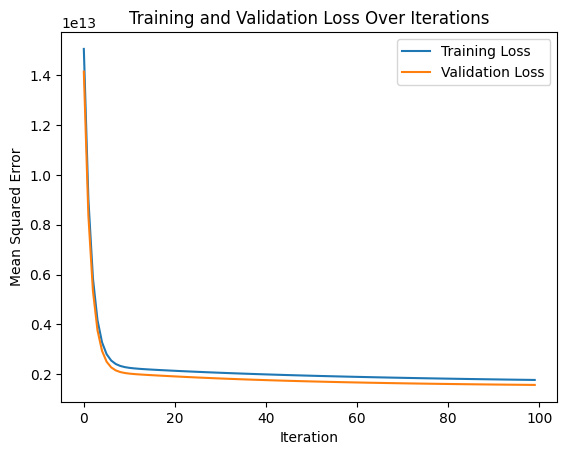

[[2725688.79023172]
 [2248581.45294189]
 [1398821.67838664]
 [1894060.11468211]
 [1701653.37081503]
 [1467354.40928632]]


In [ ]:
#Problem 3A Normalization
penalty3A = 0.01
learning_rate3A = 0.1
n_iterations3A = 100
theta3A = np.zeros((6, 1))
theta3A, train_losses3A, val_losses3A = gradient_descentPP(X_2A_train, X_2A_val, y_train, y_val, theta3A, learning_rate3A, n_iterations3A, penalty3A)

#Plot
plot(train_losses3A,val_losses3A,theta3A)

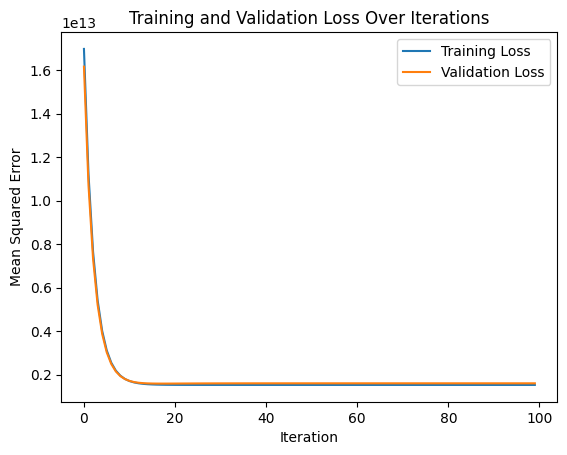

[[4772713.31185127]
 [ 736388.58950416]
 [  80295.24980163]
 [ 640784.43948404]
 [ 456085.68011825]
 [ 287144.97458769]]


In [ ]:
#Problem 3A Standardization
penalty3AS = 0.1
learning_rate3AS = 0.01
n_iterations3AS = 100
theta3AS = np.zeros((6, 1))
theta3AS, train_losses3AS, val_losses3AS = gradient_descentPP(X_2AS_train, X_2AS_val, y_train, y_val, theta3AS, learning_rate3A, n_iterations3AS, penalty3AS)

#Plot
plot(train_losses3AS,val_losses3AS,theta3AS)

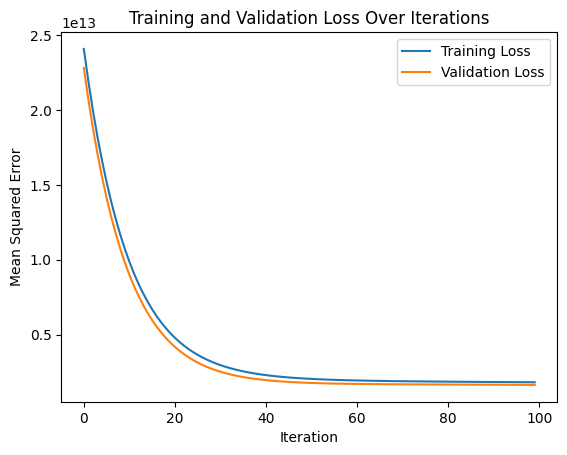

[[1863832.41504283]
 [ 613579.55860071]
 [ 828961.01335264]
 [ 422833.51951469]
 [ 762799.87190032]
 [1578572.78245054]
 [ 424260.84827646]
 [ 608794.58591957]
 [ 197805.56324312]
 [ 867676.28422391]
 [ 631644.86042084]
 [ 553217.55418041]]


In [ ]:
#Problem 3B Normalization
penalty3B = 0.1
learning_rate3B = 0.01
n_iterations3B = 100
theta3B = np.zeros((12, 1))
theta3B, train_losses3B, val_losses3B = gradient_descentPP(X_2B_train, X_2B_val, y_train, y_val, theta3B, learning_rate3B, n_iterations3B, penalty3B)

#Plot
plot(train_losses3B,val_losses3B,theta3B)

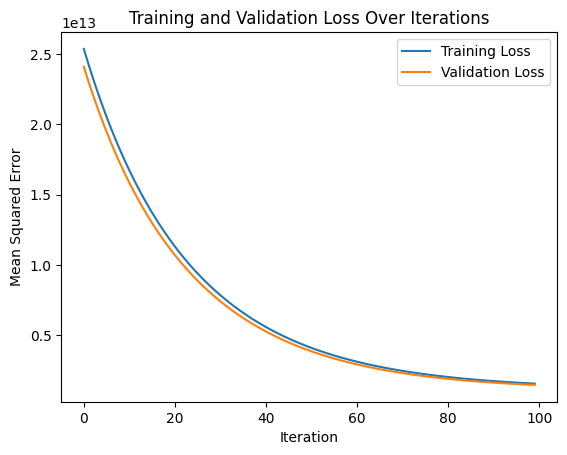

[[4143864.96597612]
 [ 480716.38981376]
 [  86843.99661129]
 [ 541500.10977196]
 [ 389543.10662973]
 [ 233091.56443512]
 [ 152565.09879691]
 [ 159724.15880946]
 [ 203982.63910519]
 [ 339270.26743111]
 [ 314523.19401463]
 [ 244645.32084376]]


In [ ]:
#Problem 3B Standardization
penalty3BS = 0.1
learning_rate3BS = 0.01
n_iterations3BS = 100
theta3BS = np.zeros((12, 1))
theta3BS, train_losses3BS, val_losses3BS = gradient_descentPP(X_2BS_train, X_2BS_val, y_train, y_val, theta3BS, learning_rate3BS, n_iterations3BS, penalty3BS)

#Plot
plot(train_losses3BS,val_losses3BS,theta3BS)